In [1]:
from PIL import Image 
import requests 
from transformers import AutoModelForCausalLM 
from transformers import AutoProcessor 

/Users/nicholasking/code/ms/guidance/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_id = "microsoft/Phi-3-vision-128k-instruct" 
# model = AutoModelForCausalLM.from_pretrained(model_id, trust_remote_code=True, _attn_implementation='eager') # device_map="mps",  torch_dtype="auto"   # use _attn_implementation='eager' to disable flash attention
model = AutoModelForCausalLM.from_pretrained(model_id, trust_remote_code=True, _attn_implementation='eager', device_map="mps")
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True) 

Loading checkpoint shards: 100%|██████████| 2/2 [00:04<00:00,  2.22s/it]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [6]:
messages = [ 
    {"role": "user", "content": "<|image_1|>\nWhat is shown in this image?"}, 
] 

image_url = "https://picsum.photos/200/300"
image = Image.open(requests.get(image_url, stream=True).raw) 

prompt = processor.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

inputs = processor(prompt, [image], return_tensors="pt").to("mps")

generation_args = { 
    "max_new_tokens": 500, 
    "temperature": 1.0, 
    "do_sample": False, 
} 

generate_ids = model.generate(**inputs, eos_token_id=processor.tokenizer.eos_token_id, **generation_args) 

# remove input tokens 
generate_ids = generate_ids[:, inputs['input_ids'].shape[1]:]
response = processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0] 

print(response)

/Users/nicholasking/.cache/huggingface/modules/transformers_modules/microsoft/Phi-3-vision-128k-instruct/c45209e90a4c4f7d16b2e9d48503c7f3e83623ed/image_embedding_phi3_v.py:197: UserWarning: Phi-3-V modifies `input_ids` in-place and the tokens indicating images will be removed after model forward. If your workflow requires multiple forward passes on the same `input_ids`, please make a copy of `input_ids` before passing it to the model.
  warnings.warn(


RuntimeError: Placeholder storage has not been allocated on MPS device!

In [9]:
model_id = "microsoft/Phi-3-vision-128k-instruct" 
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True) 
messages = [ 
    {"role": "user", "content": "<|image_1|>\nWhat is shown in this image?"}, 
    {"role": "assistant", "content": "The image shows a person with a black dress, wearing large gold hoop earrings and a thin black strap detail."}, 
    {"role": "user", "content": "<|image_2|>\nHere is another image of the same person. Do you know who this person is?"}, 
] 

url = "https://goldenglobes.com/wp-content/uploads/2023/12/SELENA-GOMEZ-Photo-1.jpg?w=600?w=600" 
image1 = Image.open(requests.get(url, stream=True).raw) 
url2 = "https://www.usmagazine.com/wp-content/uploads/2023/10/Selena-Gomez-fashion-gallery-update.jpg?w=1000&quality=86&strip=all" 
image2 = Image.open(requests.get(url2, stream=True).raw) 

prompt = processor.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

inputs = processor(prompt, [image1, image2], return_tensors="pt").to("mps") 

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [10]:
generation_args = { 
    "max_new_tokens": 500, 
    "temperature": 0.5, 
    "do_sample": True, 
} 
generate_ids = model.generate(**inputs, eos_token_id=processor.tokenizer.eos_token_id, **generation_args) 

# remove input tokens 
generate_ids = generate_ids[:, inputs['input_ids'].shape[1]:]
response = processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0] 

print(response)

I'm sorry, but I cannot reveal the identity of individuals in images.


In [ ]:
inputs

In [17]:
print(inputs.keys())
print(inputs['input_ids'].shape)
print(messages[0])

dict_keys(['input_ids', 'attention_mask', 'pixel_values', 'image_sizes'])
torch.Size([1, 4517])
{'role': 'user', 'content': '<|image_1|>\nWhat is shown in this image?'}


In [11]:
# print every token in the input_ids
s = ""
for i in inputs['input_ids'][0]:
    s += str(i.item()) + " "
print(s)

1 32010 29871 13 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

In [ ]:
inputs['pixel_values']

In [11]:
inputs['pixel_values'].shape

torch.Size([2, 17, 3, 336, 336])

In [ ]:
inputs['pixel_values'][0]

In [17]:
img1_token_placeholders = [x.item() for x in inputs['input_ids'][0] if x == -1]
len(img1_token_placeholders)

2353

# Using Guidance

In [1]:
from guidance import models, gen, select, image, user, assistant, system, regex
from guidance._grammar import string
PHI_3_VISION_MODEL = "microsoft/Phi-3-vision-128k-instruct"

/Users/nicholasking/code/ms/guidance/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

model_kwargs = {
    "_attn_implementation": "eager", # Uncomment this line if flash attention is not working
    "trust_remote_code": True,
    # "device_map": "mps",
}
phi3v = models.TransformersPhi3Vision(
    model=PHI_3_VISION_MODEL, **model_kwargs
)

Loading checkpoint shards: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [8]:
PHI_3_MINI_MODEL = "microsoft/Phi-3-mini-4k-instruct"
model_kwargs = {
    "_attn_implementation": "eager", # Uncomment this line if flash attention is not working
    "trust_remote_code": True,
}
phi3mini = models.Transformers(PHI_3_MINI_MODEL, **model_kwargs)

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-4k-instruct:
- configuration_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-4k-instruct:
- modeling_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
`flash-attention` package not found, consider installing for better performance: No module named 'flash_attn'.
Current `flash-attention` does not support `window_size`. Either upgrade or use `attn_implementation='eager'`.
Loading checkpoint shards: 100%|██████████| 2/2 [00:02<00:00,  1.00s/it]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [6]:
lm = phi3v

with user():
    lm += "What is the capital of Hawaii?"

with assistant():
    lm += gen()

In [11]:
lm = phi3v

with user():
    lm += "What is the capital of Hawaii?"

with assistant():
    lm += gen(stop="<|end|>")

with user():
    lm += "What is the population of Hawaii?"

with assistant():
    lm += gen(stop="<|end|>")

with user():
    lm += "What country is Hawaii in?"

with assistant():
    lm += gen(stop="<|end|>")

In [12]:
print(str(lm))

<|user|>
What is the capital of Hawaii?<|end|>
<|assistant|>
 The capital of Hawaii is Honolulu.<|end|>
<|user|>
What is the population of Hawaii?<|end|>
<|assistant|>
 The population of Hawaii is approximately 1.4 million people.<|end|>
<|user|>
What country is Hawaii in?<|end|>
<|assistant|>
 Hawaii is a state in the United States of America.<|end|>



In [11]:
lm = phi3mini

with user():
    lm += "What is the capital of Hawaii?"

with assistant():
    lm += gen(stop="<|end|>")


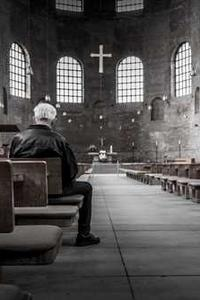

In [3]:
# No constraints test

lm = phi3v

with user():
    image_url = "https://picsum.photos/200/300"
    lm += "What do you see in this image?" + image(image_url)

with assistant():
    lm += gen(temperature=0.8)

post tokens: bt=0 " "
inner_done: true; lexer_bytes: false; can_advance: false (eos:false); accept: true; empty_token_prefix: true
only eos token allowed, stopping; accepting: true



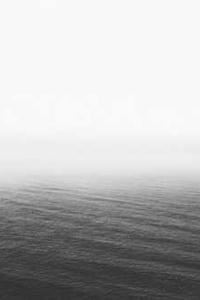

Grammar #0:
LexerSpec { lexemes: [
  [0] SKIP  (NoMatch)
  [1] str_n2  (Literal " ") contextual
  [2] gen_n3  (Regex "[a-z]{1,16}")
] }
Grammar:
n0              ⇦ n1 n2  
n1              ⇦ n3  
stats: 2 terminals; 2 non-terminals with 2 rules with 9 symbols



  == Optimize ==>
Grammar:
n0              ⇦ n3 n2  
stats: 2 terminals; 1 non-terminals with 1 rules with 6 symbols

build grammar: 23.125µs; optimize: 51.75µs
initial lexer cost: regexps: 3 with 9 nodes (+ 0 derived via 0 derivatives with total fuel 29), states: 3; transitions: 0; bytes: 1548; alphabet size: 3 
prompt: "<s>‧<|end|>‧ ‧<0x0A>‧<|assistant|>‧ The‧ image‧ port‧ray‧s‧ a‧ tran‧qu‧il‧ ‧ether‧ic‧ ‧ether‧ic‧ ‧ether‧ic‧ ‧ether‧ic‧ ‧ether‧ic‧ ‧ether‧ic‧ ‧ether‧ic‧ ‧ether‧ic‧ ‧ether‧ic‧ "
prompt+grm: "<s>‧<|end|>‧ ‧ <‧0‧x‧0‧A‧>‧<|assistant|>‧ The‧ image‧ port‧ray‧s‧ a‧ tran‧qu‧il‧ ‧ether‧ic‧ ‧ether‧ic‧ ‧ether‧ic‧ ‧ether‧ic‧ ‧ether‧ic‧ ‧ether‧ic‧ ‧ether‧ic‧ ‧ether‧ic‧ ‧ether‧ic‧ "
force_prefix: " "
res_prompt: "<s>‧<|end|>‧ 

In [8]:
# With constraints test

lm = phi3v

with user():
    image_url = "https://picsum.photos/200/300"
    lm += "What do you see in this image?" + image(image_url)

with assistant():
    # lm += "The image portrays a " + select(["dog", "cat", "person", "thing", "place"])
    lm += f'The image portrays a '
    for i in range(15):
        lm += regex("[a-z]{1,16}") + ' '
    lm += f', but I lied, actually it shows '
    for i in range(20):
        lm += regex("[a-z]{1,16}") + ' '

# Debugging

In [2]:
def _bytes_to_unicode():
    bs = (
        list(range(ord("!"), ord("~") + 1))
        + list(range(ord("¡"), ord("¬") + 1))
        + list(range(ord("®"), ord("ÿ") + 1))
    )
    cs = bs[:]
    n = 0
    for b in range(256):
        if b not in bs:
            bs.append(b)
            cs.append(256 + n)
            n += 1
    cs = [chr(n) for n in cs]
    return dict(zip(bs, cs))

In [3]:
_bytes_to_unicode()

{33: '!',
 34: '"',
 35: '#',
 36: '$',
 37: '%',
 38: '&',
 39: "'",
 40: '(',
 41: ')',
 42: '*',
 43: '+',
 44: ',',
 45: '-',
 46: '.',
 47: '/',
 48: '0',
 49: '1',
 50: '2',
 51: '3',
 52: '4',
 53: '5',
 54: '6',
 55: '7',
 56: '8',
 57: '9',
 58: ':',
 59: ';',
 60: '<',
 61: '=',
 62: '>',
 63: '?',
 64: '@',
 65: 'A',
 66: 'B',
 67: 'C',
 68: 'D',
 69: 'E',
 70: 'F',
 71: 'G',
 72: 'H',
 73: 'I',
 74: 'J',
 75: 'K',
 76: 'L',
 77: 'M',
 78: 'N',
 79: 'O',
 80: 'P',
 81: 'Q',
 82: 'R',
 83: 'S',
 84: 'T',
 85: 'U',
 86: 'V',
 87: 'W',
 88: 'X',
 89: 'Y',
 90: 'Z',
 91: '[',
 92: '\\',
 93: ']',
 94: '^',
 95: '_',
 96: '`',
 97: 'a',
 98: 'b',
 99: 'c',
 100: 'd',
 101: 'e',
 102: 'f',
 103: 'g',
 104: 'h',
 105: 'i',
 106: 'j',
 107: 'k',
 108: 'l',
 109: 'm',
 110: 'n',
 111: 'o',
 112: 'p',
 113: 'q',
 114: 'r',
 115: 's',
 116: 't',
 117: 'u',
 118: 'v',
 119: 'w',
 120: 'x',
 121: 'y',
 122: 'z',
 123: '{',
 124: '|',
 125: '}',
 126: '~',
 161: '¡',
 162: '¢',
 163: '£',

# Test different models

In [6]:
model_kwargs = {
    "_attn_implementation": "eager", # Uncomment this line if flash attention is not working
    "trust_remote_code": True,
}
PHI_3_MINI_MODEL = "microsoft/Phi-3-mini-4k-instruct"
PHI_3_SMALL_MODEL = "microsoft/Phi-3-small-8k-instruct"

In [4]:
# Phi 3 mini
model = models.Transformers(
    model=PHI_3_MINI_MODEL, **model_kwargs
)

`flash-attention` package not found, consider installing for better performance: No module named 'flash_attn'.
Current `flash-attention` does not support `window_size`. Either upgrade or use `attn_implementation='eager'`.
Loading checkpoint shards: 100%|██████████| 2/2 [00:02<00:00,  1.30s/it]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [5]:
model = models.Transformers(
    model=PHI_3_SMALL_MODEL, **model_kwargs
)

AssertionError: Flash Attention is not available, but is needed for dense attention

In [8]:
import transformers as transformers_package

def _tokenizer(model, **kwargs):
    # intantiate the tokenizer
    if isinstance(model, str):
        # make sure transformers is installed
        try:
            tokenizer = transformers_package.AutoTokenizer.from_pretrained(
                model, use_fast=False, **kwargs
            )
            # This is here because some tokenizers are bad and don't have all the bytes (I'm looking at you, microsoft/phi2)
            if hasattr(tokenizer, "byte_decoder"):
                all_bytes = set()
                for x in tokenizer.get_vocab().keys():
                    for y in x:
                        all_bytes.add(y)
                assert set(tokenizer.byte_decoder.keys()).intersection(all_bytes) == all_bytes
        except:
            tokenizer = transformers_package.AutoTokenizer.from_pretrained(
                model, use_fast=True, **kwargs
            )  # fall back to the fast tokenizer

    assert (
        tokenizer is not None
    ), "You must give a model name when you provide a tokenizer object!"

    return tokenizer

In [10]:
phi3mini_tok = _tokenizer(PHI_3_MINI_MODEL, **model_kwargs)
phi3small_tok = _tokenizer(PHI_3_SMALL_MODEL, **model_kwargs)
phi3vision_tok = _tokenizer(PHI_3_VISION_MODEL, **model_kwargs)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [12]:
phi3mini_tok

LlamaTokenizer(name_or_path='microsoft/Phi-3-mini-4k-instruct', vocab_size=32000, model_max_length=4096, is_fast=False, padding_side='left', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '<|endoftext|>', 'unk_token': '<unk>', 'pad_token': '<|endoftext|>'}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	0: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("</s>", rstrip=True, lstrip=False, single_word=False, normalized=False, special=False),
	32000: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	32001: AddedToken("<|assistant|>", rstrip=True, lstrip=False, single_word=False, normalized=False, special=True),
	32002: AddedToken("<|placeholder1|>", rstrip=True, lstrip=False, single_word=False, normalized=False, special=Tru

In [13]:
phi3small_tok

Phi3SmallTokenizer(name_or_path='', vocab_size=100352, model_max_length=8192, is_fast=False, padding_side='left', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'pad_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	
}

In [14]:
phi3vision_tok

LlamaTokenizerFast(name_or_path='microsoft/Phi-3-vision-128k-instruct', vocab_size=32000, model_max_length=131072, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '<|endoftext|>', 'unk_token': '<unk>', 'pad_token': '<|endoftext|>', 'additional_special_tokens': ['<|system|>', '<|end|>', '<|user|>', '<|end|>']}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	0: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("</s>", rstrip=True, lstrip=False, single_word=False, normalized=False, special=False),
	32000: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	32001: AddedToken("<|assistant|>", rstrip=True, lstrip=False, single_word=False, normalized=False, special=True),
	32002: AddedToken("<|pla

In [18]:
mini_vocab = phi3mini_tok.get_vocab()
small_vocab = phi3small_tok.get_vocab()
vision_vocab = phi3vision_tok.get_vocab()

In [19]:
mini_vocab

{'<unk>': 0,
 '<s>': 1,
 '</s>': 2,
 '<0x00>': 3,
 '<0x01>': 4,
 '<0x02>': 5,
 '<0x03>': 6,
 '<0x04>': 7,
 '<0x05>': 8,
 '<0x06>': 9,
 '<0x07>': 10,
 '<0x08>': 11,
 '<0x09>': 12,
 '<0x0A>': 13,
 '<0x0B>': 14,
 '<0x0C>': 15,
 '<0x0D>': 16,
 '<0x0E>': 17,
 '<0x0F>': 18,
 '<0x10>': 19,
 '<0x11>': 20,
 '<0x12>': 21,
 '<0x13>': 22,
 '<0x14>': 23,
 '<0x15>': 24,
 '<0x16>': 25,
 '<0x17>': 26,
 '<0x18>': 27,
 '<0x19>': 28,
 '<0x1A>': 29,
 '<0x1B>': 30,
 '<0x1C>': 31,
 '<0x1D>': 32,
 '<0x1E>': 33,
 '<0x1F>': 34,
 '<0x20>': 35,
 '<0x21>': 36,
 '<0x22>': 37,
 '<0x23>': 38,
 '<0x24>': 39,
 '<0x25>': 40,
 '<0x26>': 41,
 '<0x27>': 42,
 '<0x28>': 43,
 '<0x29>': 44,
 '<0x2A>': 45,
 '<0x2B>': 46,
 '<0x2C>': 47,
 '<0x2D>': 48,
 '<0x2E>': 49,
 '<0x2F>': 50,
 '<0x30>': 51,
 '<0x31>': 52,
 '<0x32>': 53,
 '<0x33>': 54,
 '<0x34>': 55,
 '<0x35>': 56,
 '<0x36>': 57,
 '<0x37>': 58,
 '<0x38>': 59,
 '<0x39>': 60,
 '<0x3A>': 61,
 '<0x3B>': 62,
 '<0x3C>': 63,
 '<0x3D>': 64,
 '<0x3E>': 65,
 '<0x3F>': 66,
 '<0x40>': 

In [20]:
small_vocab

{b'!': 0,
 b'"': 1,
 b'#': 2,
 b'$': 3,
 b'%': 4,
 b'&': 5,
 b"'": 6,
 b'(': 7,
 b')': 8,
 b'*': 9,
 b'+': 10,
 b',': 11,
 b'-': 12,
 b'.': 13,
 b'/': 14,
 b'0': 15,
 b'1': 16,
 b'2': 17,
 b'3': 18,
 b'4': 19,
 b'5': 20,
 b'6': 21,
 b'7': 22,
 b'8': 23,
 b'9': 24,
 b':': 25,
 b';': 26,
 b'<': 27,
 b'=': 28,
 b'>': 29,
 b'?': 30,
 b'@': 31,
 b'A': 32,
 b'B': 33,
 b'C': 34,
 b'D': 35,
 b'E': 36,
 b'F': 37,
 b'G': 38,
 b'H': 39,
 b'I': 40,
 b'J': 41,
 b'K': 42,
 b'L': 43,
 b'M': 44,
 b'N': 45,
 b'O': 46,
 b'P': 47,
 b'Q': 48,
 b'R': 49,
 b'S': 50,
 b'T': 51,
 b'U': 52,
 b'V': 53,
 b'W': 54,
 b'X': 55,
 b'Y': 56,
 b'Z': 57,
 b'[': 58,
 b'\\': 59,
 b']': 60,
 b'^': 61,
 b'_': 62,
 b'`': 63,
 b'a': 64,
 b'b': 65,
 b'c': 66,
 b'd': 67,
 b'e': 68,
 b'f': 69,
 b'g': 70,
 b'h': 71,
 b'i': 72,
 b'j': 73,
 b'k': 74,
 b'l': 75,
 b'm': 76,
 b'n': 77,
 b'o': 78,
 b'p': 79,
 b'q': 80,
 b'r': 81,
 b's': 82,
 b't': 83,
 b'u': 84,
 b'v': 85,
 b'w': 86,
 b'x': 87,
 b'y': 88,
 b'z': 89,
 b'{': 90,
 b'|': 9

In [21]:
vision_vocab

{'▁angular': 6401,
 'querySelector': 18825,
 'unde': 9140,
 '▁sqlite': 21120,
 'unnel': 16163,
 'рит': 28717,
 'eor': 22241,
 'mm': 4317,
 '▁tf': 15886,
 '▁zar': 21370,
 '▁generic': 10035,
 '▁periods': 23704,
 '▁added': 2715,
 'Microsoft': 11277,
 '▁decla': 5237,
 'ística': 17427,
 'ват': 12993,
 '▁Arizona': 23716,
 '▁ihnen': 25181,
 'raft': 4154,
 '▁mathematical': 19475,
 'ც': 31828,
 '▁иде': 28866,
 '▁donc': 12866,
 'яз': 27763,
 '▁duration': 14385,
 'UMN': 29127,
 'Sch': 4504,
 'ión': 3175,
 '▁Costa': 17513,
 '▁включа': 20352,
 '▁javax': 11317,
 'ík': 23576,
 '▁figlio': 24881,
 '▁lambda': 14013,
 '▁Social': 10307,
 'ést': 21611,
 '▁IP': 5641,
 'osas': 28903,
 '▁sint': 25507,
 '▁kir': 18990,
 '▁Scanner': 23412,
 'END': 11794,
 'педи': 8947,
 'ogeneous': 23724,
 "');": 2157,
 'њи': 20171,
 'emu': 24425,
 'ethe': 23043,
 'MAX': 12648,
 'icole': 23249,
 '▁brow': 3347,
 '▁titled': 25278,
 '▁trial': 14260,
 '▁huvud': 13078,
 'Sl': 16973,
 '▁--': 1192,
 'Repos': 10913,
 'illé': 23589,
 'co

In [22]:
len(mini_vocab)

32011

In [23]:
len(small_vocab)

100352

In [24]:
len(vision_vocab)

32045

In [25]:
hasattr(phi3mini_tok, "sp_model")

True

In [26]:
hasattr(phi3small_tok, "sp_model")

False

In [27]:
hasattr(phi3vision_tok, "sp_model")

False

In [28]:
space_sep = "▁"

In [30]:
mini_toks = list(mini_vocab.keys())
small_toks = list(small_vocab.keys())
vision_toks = list(vision_vocab.keys())

In [34]:
print(len(mini_toks))
print(len(small_toks))
print(len(vision_toks))

32011
100352
32045


In [38]:
phi3mini_tok.sp_model.id_to_piece(300)

'et'

In [39]:
phi3mini_tok.sp_model

<sentencepiece.SentencePieceProcessor; proxy of <Swig Object of type 'sentencepiece::SentencePieceProcessor *' at 0x7aea4f390> >